##  Text Representation Using Classical Methods 

In [1]:
import pandas as pd
import joblib as jbl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading X, and Y from our preprocessed dataset

In [2]:
df = jbl.load("preprocessed_df.pkl")
labels = df.columns[3:-1]
tokenized_sents = df["clean_text"].values
targets = df[labels].to_numpy()
print(targets[0:5])
print(tokenized_sents[0:5])

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[list(['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pas', 'haiti'])
 list(['hurricane']) list(['looking', 'someone', 'name'])
 list(['un', 'report', 'leogane', 'destroyed', 'hospital', 'st', 'croix', 'functioning', 'need', 'supply', 'desperately'])
 list(['say', 'west', 'side', 'haiti', 'rest', 'country', 'today', 'tonight'])]


### Word Cloud visualization on token frequencies

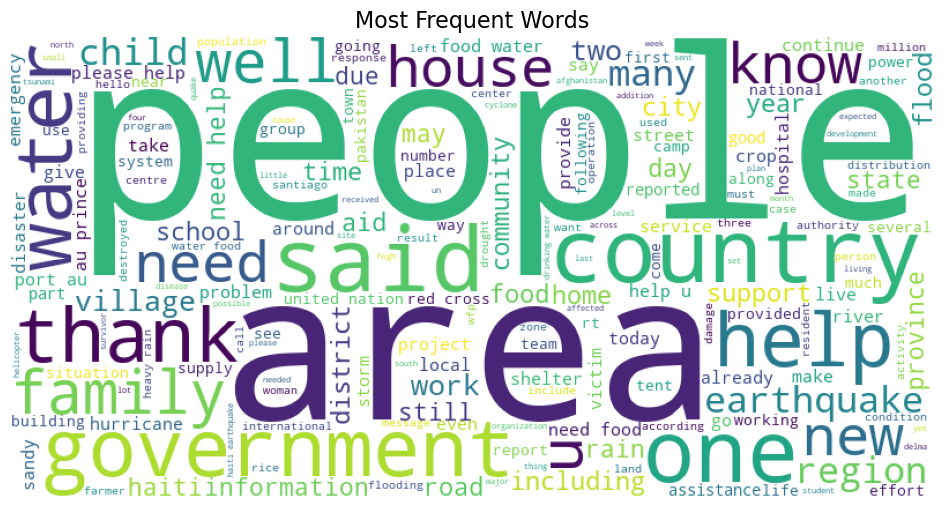

In [3]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, colormap='viridis',).generate(" ".join([w for sent in tokenized_sents for w in sent]))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Frequent Words", fontsize=16)
plt.show()

### Barplot on top 30 words

[('water', 3039), ('people', 3013), ('food', 2902), ('help', 2650), ('need', 2491), ('please', 2048), ('u', 1903), ('earthquake', 1876), ('area', 1667), ('like', 1532), ('would', 1491), ('said', 1351), ('country', 1250), ('know', 1116), ('also', 1114), ('government', 1054), ('one', 1020), ('rain', 1011), ('flood', 990), ('information', 974), ('haiti', 968), ('year', 956), ('house', 930), ('find', 922), ('tent', 856), ('family', 851), ('good', 836), ('aid', 836), ('relief', 811), ('child', 805)]


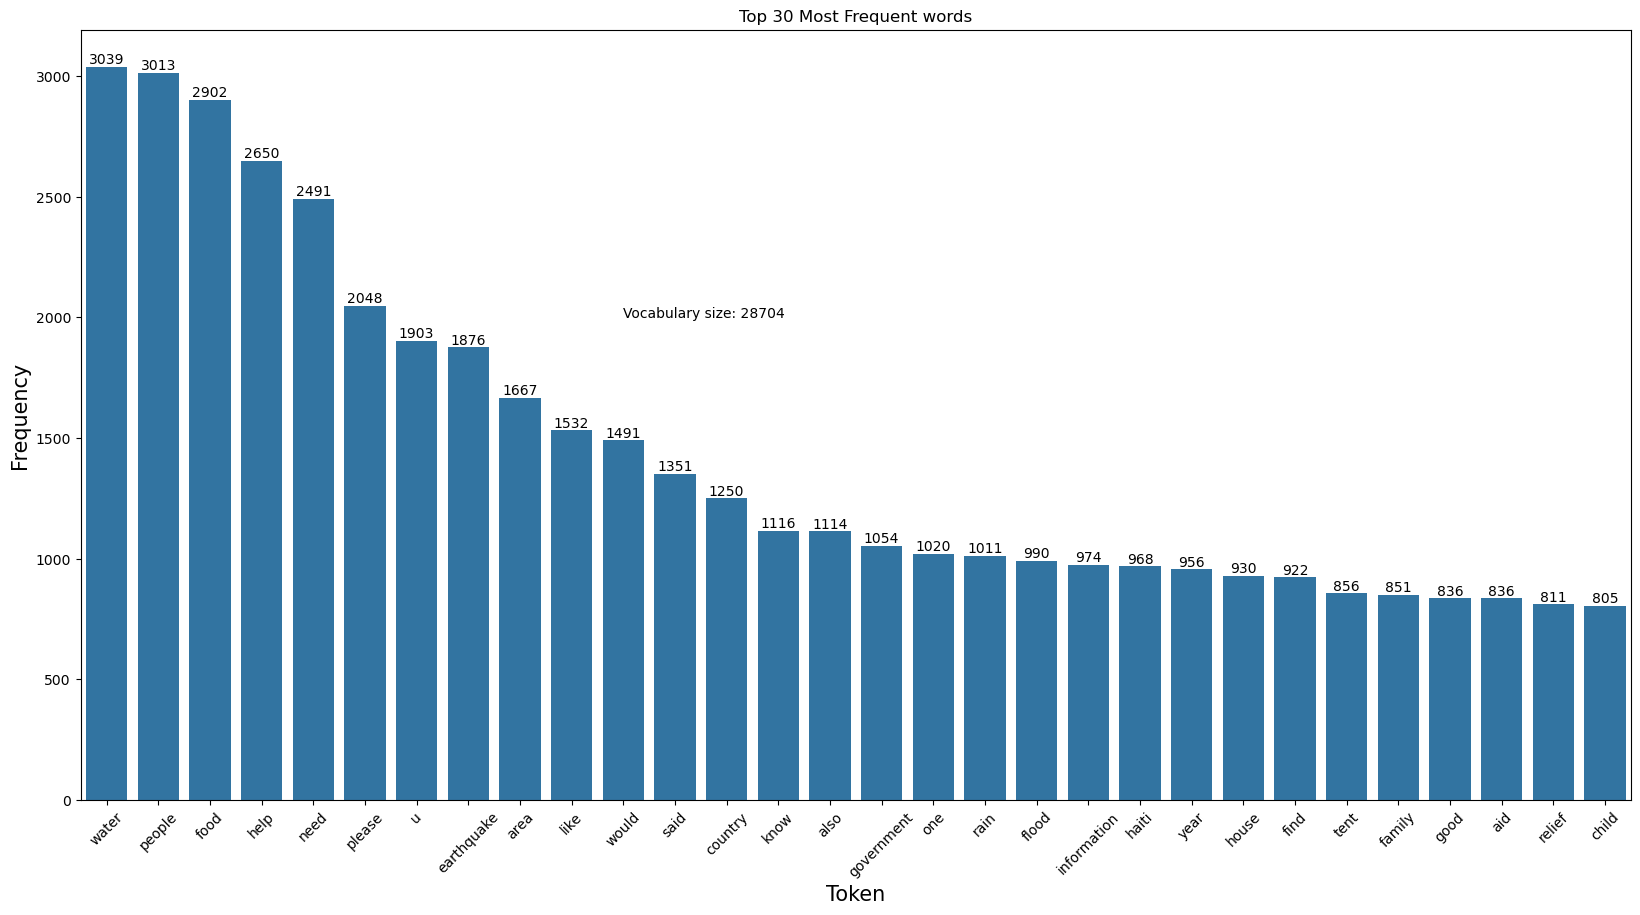

In [4]:
from nltk import FreqDist
freqs = FreqDist([w for sent in tokenized_sents for w in sent])
vocabulary = len(freqs)
freqs = freqs.most_common()[:30]
print(freqs)
plt.figure(figsize=(20,10))
ax = sns.barplot(x = [w_f[0] for w_f in freqs], y = [w_f[1] for w_f in freqs])
ax.bar_label(ax.containers[0])
ax.text(10, 2000, f"Vocabulary size: {vocabulary}")
plt.title("Top 30 Most Frequent words")
plt.xlabel("Token", size = 15)
plt.ylabel("Frequency", size = 15)
plt.xticks(rotation = 45)
plt.show()

### Message length distribution in corpus

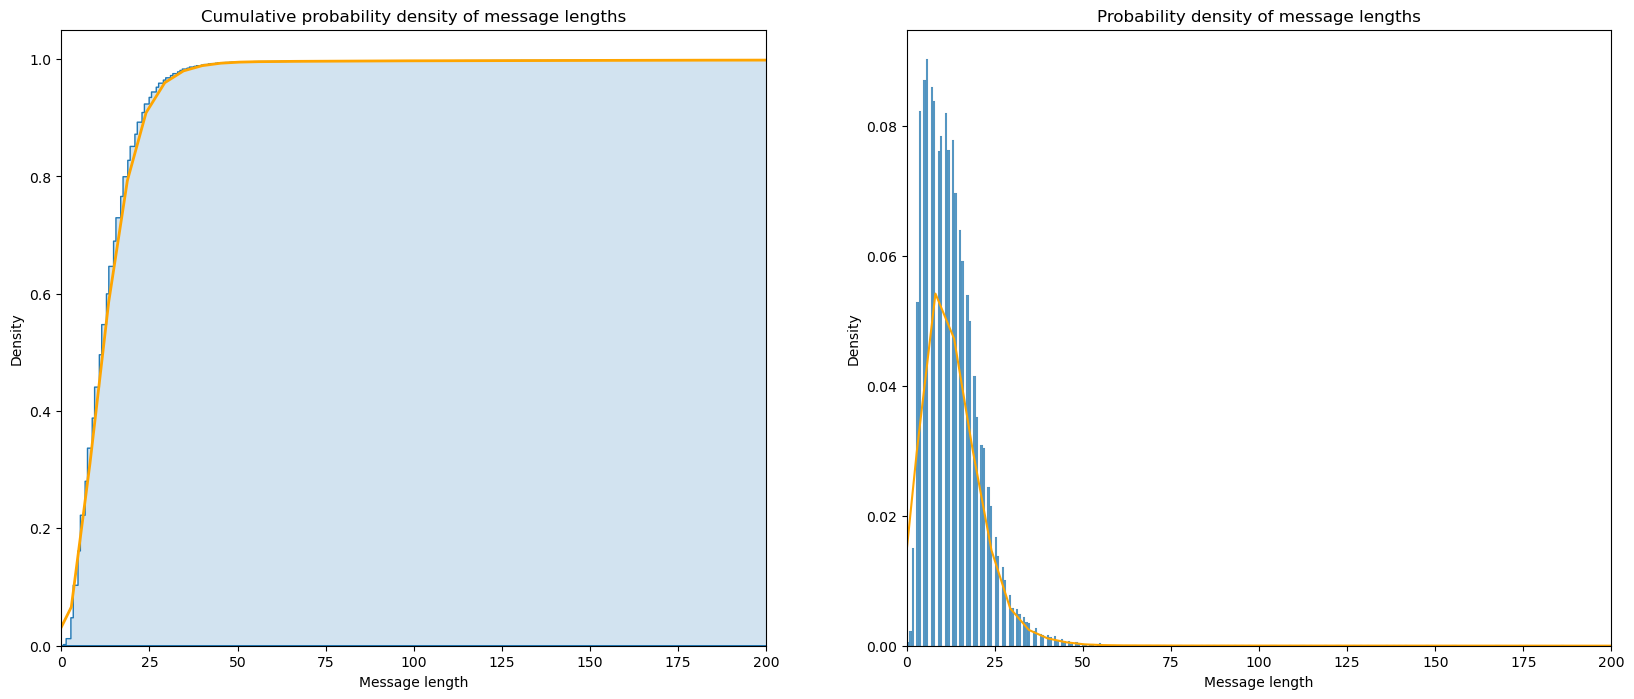

In [5]:
lengths = [len(sent) for sent in tokenized_sents]
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(lengths, stat = "density", cumulative=True, element="step", alpha = 0.2)
sns.kdeplot(lengths, color="orange", lw=2, cumulative=True)
plt.xlim((0,200))
plt.xlabel("Message length")
plt.title("Cumulative probability density of message lengths")
plt.subplot(1,2,2)
sns.histplot(lengths, stat = "density")
sns.kdeplot(lengths, color="orange")
plt.xlim((0,200))
plt.xlabel("Message length")
plt.title("Probability density of message lengths")
plt.show()

So we can see that almost 99% of messages is shorter than 50 tokens length, this is very useful, when we will be padding and building our embedding sequences for the deep learning methods

### Train test splitting

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(tokenized_sents, targets, test_size=0.2, random_state=255)
X_train_texts = [' '.join(tokenized) for tokenized in X_train]
X_test_texts  = [' '.join(tokenized) for tokenized in X_test]

In [7]:
jbl.dump(Y_train, "y_train.pkl")
jbl.dump(Y_test, "y_test.pkl")

['y_test.pkl']

## BOW (Bag of words)

So we see sparse vector representation of documents from the sparse matrix, we are also going to skip hapax, effectively reducing vocabulary size.

In [8]:
bow = CountVectorizer(lowercase=False, min_df=5, max_df=0.95, ngram_range=(1,1))
X_train_bow = bow.fit_transform(X_train_texts)
X_test_bow = bow.transform(X_test_texts)
print("Bow train sample")
print(X_train_bow[0])
print("Bow test sample")
print(X_test_bow[0])
print("Vocabulary size:", len(bow.get_feature_names_out()))
print("Train shape:", X_train_bow.shape)
print("Test shape", X_test_bow.shape)

Bow train sample
  (0, 350)	1
  (0, 5253)	1
  (0, 2756)	1
  (0, 4144)	1
  (0, 3461)	1
  (0, 308)	1
Bow test sample
  (0, 1707)	1
  (0, 3387)	1
  (0, 3829)	1
  (0, 4775)	1
  (0, 4825)	1
  (0, 5915)	1
Vocabulary size: 6224
Train shape: (20972, 6224)
Test shape (5244, 6224)


In [9]:
jbl.dump(X_train_bow, "bow_train.pkl")
jbl.dump(X_test_bow, "bow_test.pkl")

['bow_test.pkl']

## TF-IDF

Also sparse matrix, skipping hapax

In [10]:
tfidf = TfidfVectorizer(lowercase=False, min_df=5, max_df=0.95, ngram_range=(1,1))
X_train_tfidf = tfidf.fit_transform(X_train_texts)
X_test_tfidf = tfidf.transform(X_test_texts)
print("TF-IDF train sample")
print(X_train_tfidf[0])
print("TF-IDF test sample")
print(X_test_tfidf[0])
print("Vocabulary size:", len(tfidf.get_feature_names_out()))
print("Train shape:", X_train_tfidf.shape)
print("Test shape",  X_test_tfidf.shape)

TF-IDF train sample
  (0, 350)	0.3956350220587632
  (0, 5253)	0.3206350006124153
  (0, 2756)	0.40639210211615395
  (0, 4144)	0.39606849218740015
  (0, 3461)	0.5941356728524809
  (0, 308)	0.25621111759832194
TF-IDF test sample
  (0, 1707)	0.2328380203498406
  (0, 3387)	0.36323175860598983
  (0, 3829)	0.27190922442845744
  (0, 4775)	0.4243354406964296
  (0, 4825)	0.5664106019216554
  (0, 5915)	0.488909995080891
Vocabulary size: 6224
Train shape: (20972, 6224)
Test shape (5244, 6224)


In [11]:
jbl.dump(X_train_tfidf, "tfidf_train.pkl")
jbl.dump(X_test_tfidf, "tfidf_test.pkl")

['tfidf_test.pkl']

## Word2Vec

Training a small CBOW word2vec model

In [12]:
from gensim.models import Word2Vec
EMBED_DIM = 50
model = Word2Vec(X_train, window=5, vector_size=EMBED_DIM, epochs=10, sg=1)

### PCA decomposition of word embeddings, top 3 components

Model vocabulary: 6366
(6366, 3)


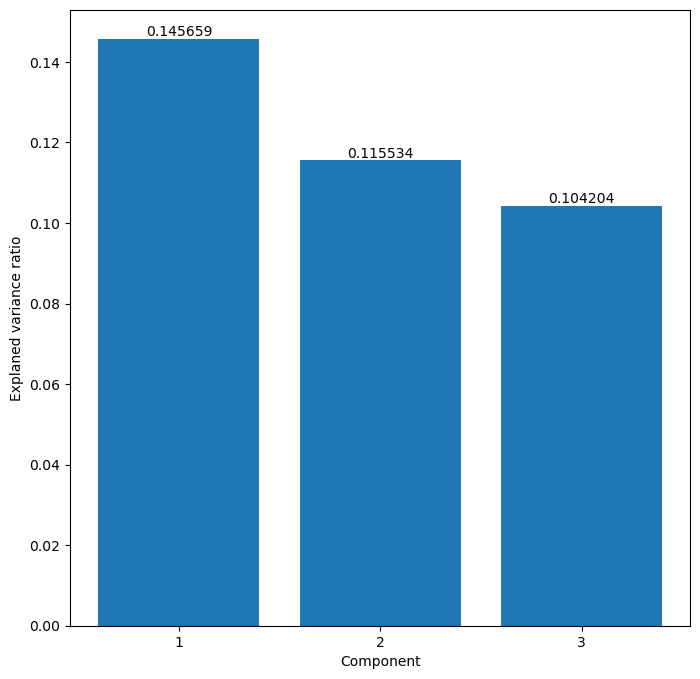

In [13]:
from sklearn.decomposition import PCA
model_vocab = list(model.wv.key_to_index)
print("Model vocabulary:", len(model_vocab))
embeddings = np.zeros((len(model_vocab), EMBED_DIM))
for i in range(len(model_vocab)):
    embeddings[i] = model.wv[model_vocab[i]]

pca = PCA(n_components=3, random_state=42).fit(embeddings)
components = pca.transform(embeddings)

print(components.shape)
plt.figure(figsize=(8,8))
contrainer = plt.bar(range(1, 4), pca.explained_variance_ratio_)
plt.xticks(range(1, 4))
plt.xlabel("Component")
plt.ylabel("Explaned variance ratio")
plt.bar_label(contrainer)
plt.show()

### Visualizing only a bit, to avoid clutter

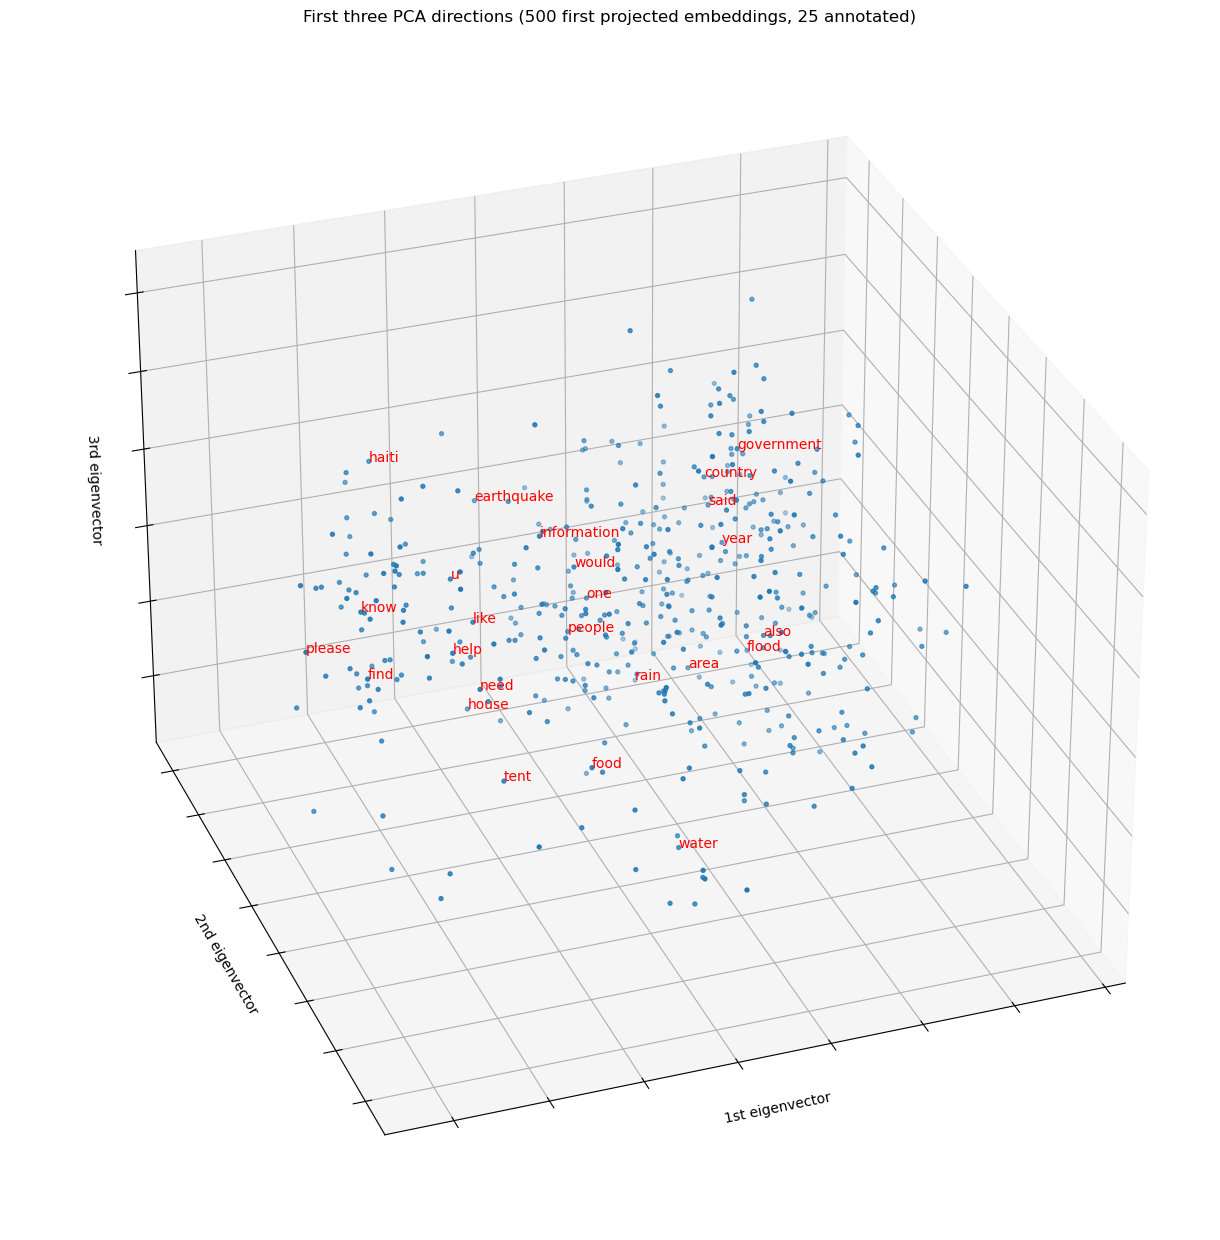

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 12))
ax = Axes3D(fig, azim=70)
fig.add_axes(ax)
ax.scatter(components[:500, 0],components[:500, 1],components[:500, 2], s = 8)
for i, word in enumerate(model_vocab[:25]): 
    ax.text(components[i, 0], components[i, 1], components[i, 2], word, fontsize=10, color = "red")
ax.set_title("First three PCA directions (500 first projected embeddings, 25 annotated)")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])
plt.show()


### We can also encode our messages into a single sense carrying vectors of EMBED DIM instead of building the sequences of vectors, but it loses the ordering, for LSTM we anyway need sequences so we can keep code below for evaluation on traditional models

In [15]:
def embed_messages(messages: list[str], model) -> np.ndarray:
    dim = model.vector_size
    sent_vectors = np.zeros((len(messages), dim))
    for i in range(sent_vectors.shape[0]):
        buff = np.zeros(dim)
        for w in messages[i]:
            try:
                w_embedding = model.wv.get_vector(w)
                buff += w_embedding
            except:
                continue
        norm = np.linalg.norm(buff)
        if norm != 0:
            sent_vectors[i] = buff / np.linalg.norm(buff)
    return sent_vectors

sense_vectors_train = embed_messages(X_train, model)
sense_vectors_test = embed_messages(X_test, model)

In [16]:
jbl.dump(sense_vectors_train, "sense_vectors_train.pkl")
jbl.dump(sense_vectors_test, "sense_vectors_test.pkl")

['sense_vectors_test.pkl']

### Message to embedding sequence for sequential models

In [17]:
def messages_to_sequences(messages: list[str], max_length: int, model) -> np.ndarray:
    dim = model.vector_size
    sent_vectors = np.zeros((len(messages), max_length, dim))
    for i in range(sent_vectors.shape[0]):
        current_pos = 0
        for j in range(len(messages[i])):
            try:
                if current_pos == max_length:
                    break
                embedding = model.wv.get_vector(messages[i][j])
                sent_vectors[i,current_pos] = embedding
                current_pos += 1
            except:
                continue
    return sent_vectors
sequences_train = messages_to_sequences(X_train, 50, model)
sequences_test = messages_to_sequences(X_test, 50, model)

In [18]:
jbl.dump(sequences_train, "sequences_train.pkl")
jbl.dump(sequences_test, "sequences_test.pkl")

['sequences_test.pkl']